# Árboles de decisión

Antes de comenzar con árboles de decisión en Scikit-Learn, vamos a desarrollar una idea intuitiva. Para eso, utilizaremos el dataset de Titanic.

**NOTA**: LEER HASTA EL FINAL ANTES DE MODIFICAR EL CÓDIGO.

Vamos a definir algunas funciones, **no importa si no terminan de entender en detalle CÓMO hacen lo que decimos que hacen**.

1. La siguiente función carga los datos del Titanic y separa los atributos en X y las etiquetas (si sobrevivió o no) en y. **No la tienen que modificar**.

In [1]:
import pandas as pd

def cargar_datos(csv_filename):
    df = pd.read_csv(csv_filename)
    X = df.drop("survived", axis=1)
    y = df.survived
    return X, y

2. La función *accuracy*, dada las etiquetas que ustedes predigan y las etiquetas reales, calcula la medida de performance, en este caso, la exactitud. **No la tienen que modificar**.

In [2]:
def accuracy(y_predicted, y_real):
    return sum([y_i == y_j for (y_i, y_j) in zip(y_predicted, y_real)])/len(y_real)

3. La función *predict_instance*, dada una instancia x con sus atributos, predice si sobrevivió o no. **Es la única función que tendrán que modificar**.

In [3]:
def predict_instance(x):
    ## COMPLETAR AQUI. Modificar las siguientes líneas
    # la variable prediction debe contener la etiqueta 0 o 1 
    # este será su algoritmo algoritmo para predecir si sobrevivirá o no por instancia.
#     prediction = 1 # cambiar
    
    #### UNA POSIBLE FORMA DE EMPEZAR:
#     if x.age < 12:
#         prediction = 1
#     else:
#         prediction = 0
   
    #### OTRA POSIBLE FORMA DE EMPEZAR:
 
    if x.sex == 'female':
        prediction = 1
    else:
        if x.age < 10:
            prediction = 1
        else:
            prediction = 0
    
    
    ## FIN DE COMPLETAR
    return prediction

4. Por último, la función *predict* toma todo las instancias X y, usando la función que definieron antes, predice para cada una de ellas si sobrevivió o no. **No la tienen que modificar**.

In [4]:
def predict(X):
    y_predicted = []
    for x in X.itertuples(): 
                
        y_i = predict_instance(x) 
        
        y_predicted.append(y_i)
    return y_predicted

Hasta ahora solamente definimos funciones. Acá arranca el código que llamará a esas funciones y las utilizará. Primero cargamos los datos.

In [5]:
X, y = cargar_datos(csv_filename="titanic.csv")
# Explorar X e y para ver que pinta tienen. 

Con los datos cargados, predecimos sobre ellos.

In [6]:
y_pred = predict(X)
print(y_pred)

[1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 

Y calculamos la medida de performance.

In [7]:
print("Accuracy final: ", round(accuracy(y_pred, y), 3))

Accuracy final:  0.789


**Ejercicio**: modificar *predict_instance* de forma tal de mejorar el resultado recién obtenido.

In [8]:
from sklearn.tree import DecisionTreeClassifier

Y entrenamos

In [9]:
clf = DecisionTreeClassifier(max_depth = 3)
try: 
    clf.fit(X,y)
except:
    print('No puede entrenar, el dataset contiene strings')

No puede entrenar, el dataset contiene strings


Como notarán, algo no le gustó. ¿Qué faltó? ¡Ingeniería de Features!

Arrancamos tirando aquellas columnas que tengan mayoría NaNs o que consideremos no informativas.

In [10]:
pd.DataFrame(X.isnull().sum(), columns=['Total nulos'])

,Total nulos
pclass,0
name,0
sex,0
age,203
sibsp,0
parch,0
ticket,0
fare,1
cabin,786
embarked,1


In [11]:
X_filtered = X.drop(columns = ['name', 'cabin','boat', 'body', 'home.dest', 'embarked', 'ticket'])
X_filtered.head(5)

,pclass,sex,age,sibsp,parch,fare
0,3,female,30.0,1,1,24.1500
1,3,female,22.0,0,0,39.6875
2,3,female,NaN,1,0,16.1000
3,3,male,2.0,4,1,39.6875
4,3,male,24.0,0,0,7.1417


Y probamos entrenar nuevamente

In [12]:
clf.fit(X_filtered,y)

ValueError: could not convert string to float: 'female'

Nos faltó convertir el género a números.

In [13]:
X_filtered.sex = X_filtered.sex.map({'male': 0, 'female': 1})
X_filtered.head(5)

,pclass,sex,age,sibsp,parch,fare
0,3,1,30.0,1,1,24.1500
1,3,1,22.0,0,0,39.6875
2,3,1,NaN,1,0,16.1000
3,3,0,2.0,4,1,39.6875
4,3,0,24.0,0,0,7.1417


In [14]:
clf.fit(X_filtered,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

Y ahora se queja de que sigue habiendo NaNs. Como no queremos tirar filas, completamos con la media.

In [15]:
X_filtered.fillna(X_filtered.mean(), inplace = True)
X_filtered.head(5)

,pclass,sex,age,sibsp,parch,fare
0,3,1,30.000000,1,1,24.1500
1,3,1,22.000000,0,0,39.6875
2,3,1,29.436414,1,0,16.1000
3,3,0,2.000000,4,1,39.6875
4,3,0,24.000000,0,0,7.1417


In [16]:
clf.fit(X_filtered,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

¡Pudimos entrenar! ¿Qué aprendió?

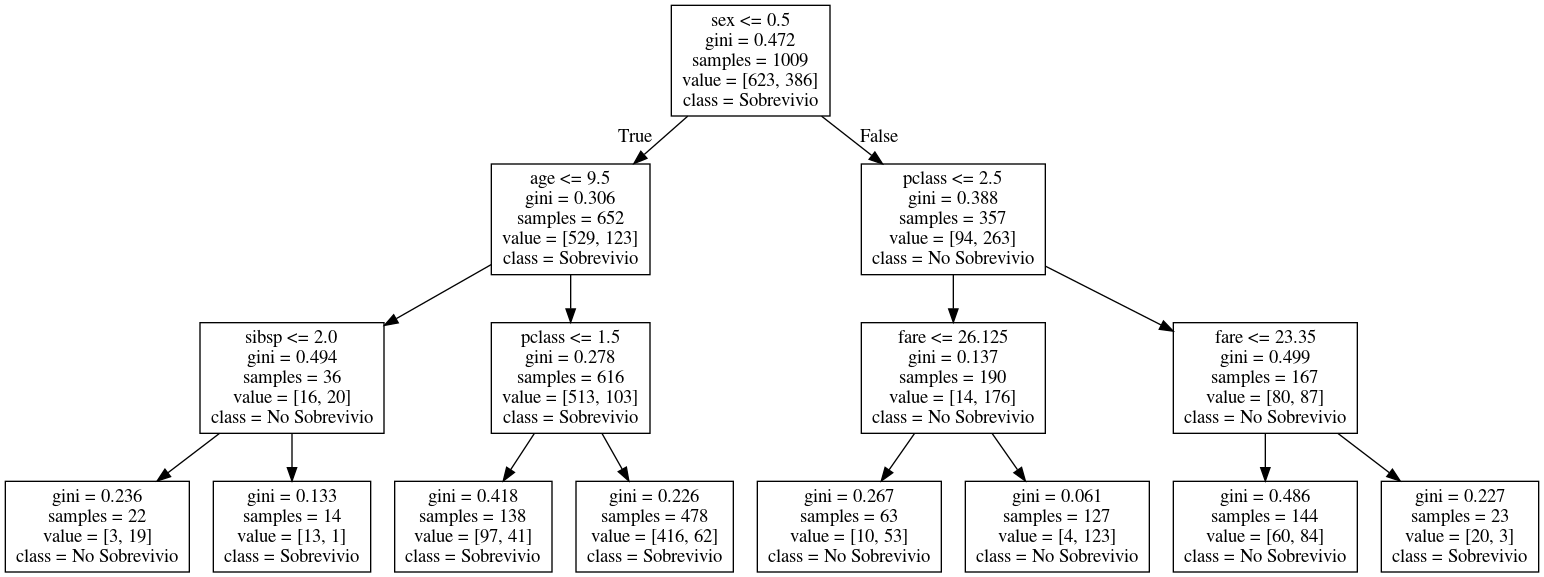

In [17]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_filtered.columns.values,
                                class_names=['Sobrevivio','No Sobrevivio'])
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())